In [79]:
import pandas as pd 
import wandb
api = wandb.Api()

# Project is specified by <entity/project-name>
runs = api.runs("viktor-cikojevic/three_d_seg")

summary_list, config_list, name_list = [], [], []
for run in runs: 
    # .summary contains the output keys/values for metrics like accuracy.
    #  We call ._json_dict to omit large files 
    summary_list.append(run.summary._json_dict)

    # .config contains the hyperparameters.
    #  We remove special values that start with _.
    config_list.append(
        {k: v for k,v in run.config.items()
          if not k.startswith('_')})

    # .name is the human-readable name of the run.
    name_list.append(run.name)

df = pd.DataFrame({
    "summary": summary_list,
    "config": config_list,
    "name": name_list
    })


In [80]:
df.head()   

,summary,config,name
0,"{'_runtime': 475.4647624492645, 'lr-AdamW': 0....","{'loss': [{'type': 'BCELoss', 'weight': 0.11},...",SMP(Unet_resnet18_imagenet)-c512x1-bs32-llr-3....
1,"{'_runtime': 1898.3938822746277, '_step': 1004...","{'loss': [{'type': 'BCELoss', 'weight': 0.01},...",SMP(Unet_resnet18_imagenet)-c512x1-bs32-llr-3....
2,"{'_wandb': {'runtime': 1909}, 'surface_dice': ...","{'loss': [{'type': 'BCELoss', 'weight': 0.21},...",SMP(Unet_resnet18_imagenet)-c512x1-bs32-llr-3....
3,"{'_step': 1004, '_runtime': 1910.8264472484589...","{'loss': [{'type': 'BCELoss', 'weight': 0.3100...",SMP(Unet_resnet18_imagenet)-c512x1-bs32-llr-3....
4,"{'_wandb': {'runtime': 1914}, 'train_loss': 0....","{'loss': [{'type': 'BCELoss', 'weight': 1.01},...",SMP(Unet_resnet18_imagenet)-c512x1-bs32-llr-3....


In [81]:
df.config.iloc[0]

{'loss': [{'type': 'BCELoss', 'weight': 0.11},
  {'type': 'MccLoss', 'weight': 0.01},
  {'type': 'DiceLoss', 'kwargs': {'smooth': 0.0001}, 'weight': 0.21},
  {'type': 'FocalLoss', 'kwargs': {'gamma': 2}, 'weight': 0.21}],
 'task': {'kwargs': {'ema_momentum': 0.00025,
   'eval_threshold': 0.2,
   'compute_crude_metrics': False}},
 'model': {'type': 'SMPModel',
  'kwargs': {'classes': 1,
   'version': 'Unet',
   'in_channels': 1,
   'encoder_name': 'resnet18',
   'encoder_weights': 'imagenet'}},
 'dataset': {'kwargs': {'load_ann': True,
   'crop_size': 512,
   'to_float32': True,
   'channel_end': None,
   'seg_fill_val': 0,
   'channel_start': 0,
   'crop_size_range': [400, 600],
   'n_take_channels': 1,
   'output_crop_size': None,
   'sample_with_mask': False,
   'p_crop_size_noise': 0.25,
   'reduce_zero_label': False,
   'assert_label_exists': True,
   'crop_location_noise': 50,
   'p_crop_size_keep_ar': 0.5,
   'normalisation_kwargs': {'std': 0.235,
    'mean': 0.5,
    'normalisat

In [82]:
def flatten_dict(d, parent_key='', sep='_'):
    items = []
    if not isinstance(d, (dict, list)):
        # Return immediately if d is neither a dictionary nor a list
        return {parent_key: d}

    for k, v in d.items() if isinstance(d, dict) else enumerate(d):
        new_key = f"{parent_key}{sep}{k}" if parent_key else k
        if isinstance(v, dict):
            items.extend(flatten_dict(v, new_key, sep=sep).items())
        elif isinstance(v, list):
            for i, item in enumerate(v):
                items.extend(flatten_dict(item, f"{new_key}{sep}{i}", sep=sep).items())
        else:
            items.append((new_key, v))
    return dict(items)


In [83]:
flat_configs = []
# loop over rows
for indx_row, row in df.iterrows():
    # Flatten the config   
    config = row['config']
    flat_config = flatten_dict(config)
    flat_configs.append(flat_config)

In [84]:
df = pd.DataFrame(flat_configs)
df.head()

,loss_0_type,loss_0_weight,loss_1_type,loss_1_weight,loss_2_type,loss_2_kwargs_smooth,loss_2_weight,loss_3_type,loss_3_kwargs_gamma,loss_3_weight,...,best_surface_dice,val_check_interval,apparent_batch_size,max_epochs,model_kwargs_is3d,model_kwargs_f_maps,model_kwargs_num_groups,model_kwargs_out_channels,model_kwargs_final_sigmoid,model_kwargs_is_segmentation
0,BCELoss,0.11,MccLoss,0.01,DiceLoss,0.0001,0.21,FocalLoss,2.0,0.21,...,0.349254,2500,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BCELoss,0.01,MccLoss,0.21,DiceLoss,0.0001,0.61,FocalLoss,2.0,0.11,...,0.865687,2500,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BCELoss,0.21,MccLoss,0.11,DiceLoss,0.0001,0.31,FocalLoss,2.0,0.31,...,0.865688,2500,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BCELoss,0.31,MccLoss,0.91,DiceLoss,0.0001,0.11,FocalLoss,2.0,0.61,...,0.881460,2500,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BCELoss,1.01,MccLoss,0.51,DiceLoss,0.0001,0.41,FocalLoss,2.0,0.11,...,0.880982,2500,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Relative weights

In [96]:
df['loss_0_weight_rel'] = df['loss_0_weight'] / (df['loss_0_weight'] + df['loss_1_weight'] + df['loss_2_weight'] + df['loss_3_weight'])
df['loss_1_weight_rel'] = df['loss_1_weight'] / (df['loss_0_weight'] + df['loss_1_weight'] + df['loss_2_weight'] + df['loss_3_weight'])
df['loss_2_weight_rel'] = df['loss_2_weight'] / (df['loss_0_weight'] + df['loss_1_weight'] + df['loss_2_weight'] + df['loss_3_weight'])
df['loss_3_weight_rel'] = df['loss_3_weight'] / (df['loss_0_weight'] + df['loss_1_weight'] + df['loss_2_weight'] + df['loss_3_weight'])

# round2to 0.02
df['loss_0_weight_rel'] = df['loss_0_weight_rel'] // 0.05 * 0.05
df['loss_1_weight_rel'] = df['loss_1_weight_rel'] // 0.05 * 0.05
df['loss_2_weight_rel'] = df['loss_2_weight_rel'] // 0.05 * 0.05
df['loss_3_weight_rel'] = df['loss_3_weight_rel'] // 0.05 * 0.05

In [97]:
# group by loss_0_weight_rel and find max best_surface_dice
df_weights = df.groupby(['loss_0_weight_rel', 'loss_1_weight_rel', 'loss_2_weight_rel', 'loss_3_weight_rel'])['best_surface_dice'].max().reset_index()
df_weights.head()

,loss_0_weight_rel,loss_1_weight_rel,loss_2_weight_rel,loss_3_weight_rel,best_surface_dice
0,0.0,0.00,0.20,0.70,0.860268
1,0.0,0.00,0.35,0.55,0.887702
2,0.0,0.00,0.55,0.35,0.879258
3,0.0,0.00,0.60,0.30,0.868373
4,0.0,0.15,0.45,0.30,0.885865


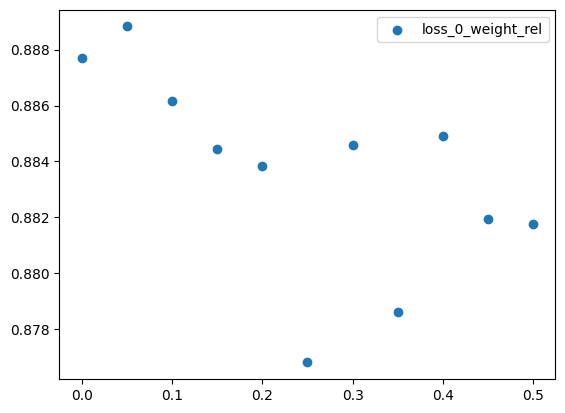

In [101]:
import matplotlib.pyplot as plt


df_weights = df.groupby(['loss_0_weight_rel'])['best_surface_dice'].max().reset_index()
plt.scatter(df_weights['loss_0_weight_rel'], df_weights['best_surface_dice'], label='loss_0_weight_rel')
plt.legend()

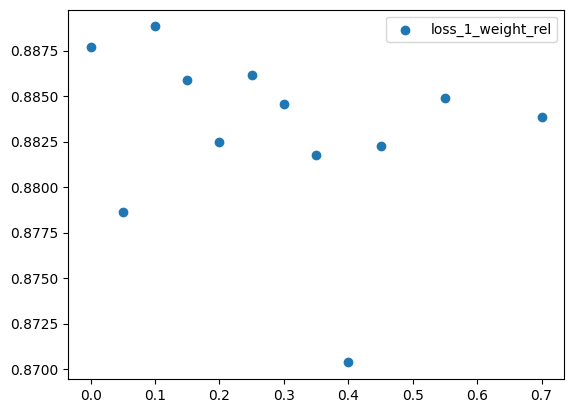

In [102]:
import matplotlib.pyplot as plt


df_weights = df.groupby(['loss_1_weight_rel'])['best_surface_dice'].max().reset_index()
plt.scatter(df_weights['loss_1_weight_rel'], df_weights['best_surface_dice'], label='loss_1_weight_rel')
plt.legend()

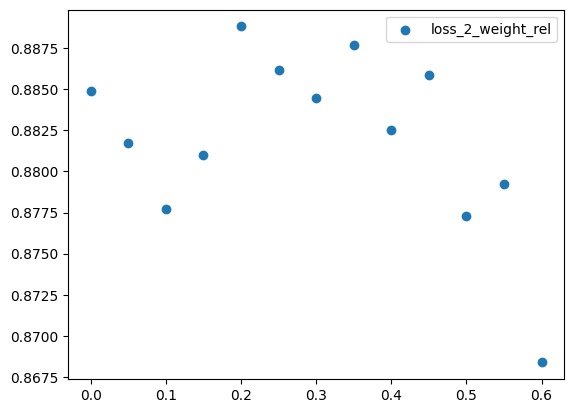

In [103]:
import matplotlib.pyplot as plt


df_weights = df.groupby(['loss_2_weight_rel'])['best_surface_dice'].max().reset_index()
plt.scatter(df_weights['loss_2_weight_rel'], df_weights['best_surface_dice'], label='loss_2_weight_rel')
plt.legend()

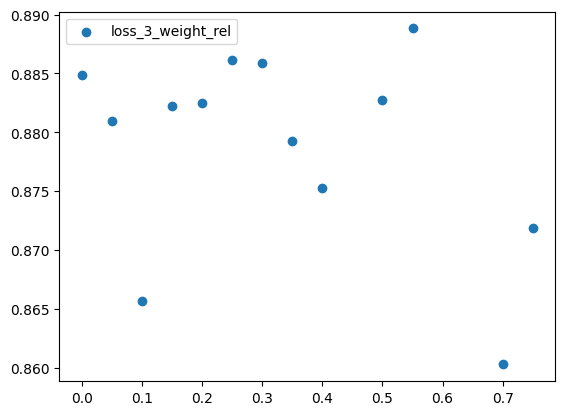

In [104]:
import matplotlib.pyplot as plt


df_weights = df.groupby(['loss_3_weight_rel'])['best_surface_dice'].max().reset_index()
plt.scatter(df_weights['loss_3_weight_rel'], df_weights['best_surface_dice'], label='loss_3_weight_rel')
plt.legend()

# Augm prob

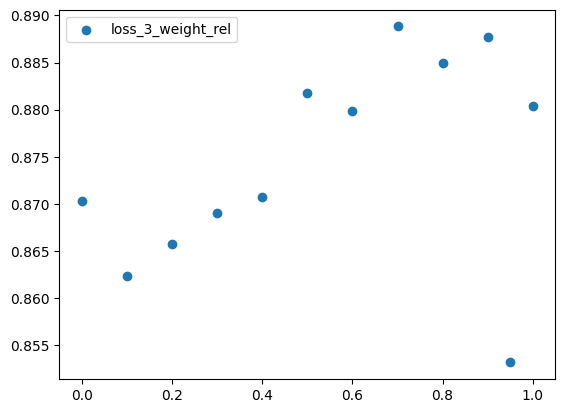

In [108]:
df['p_any_augm'] = df['augmentation_augmenter_kwargs_p_any_augm']
# round to 0.05
df['p_any_augm'] = df['p_any_augm'] // 0.05 * 0.05
df_weights = df.groupby(['p_any_augm'])['best_surface_dice'].max().reset_index()

plt.scatter(df_weights['p_any_augm'], df_weights['best_surface_dice'], label='loss_3_weight_rel')
plt.legend()

# Batch augms

In [109]:
for col in df.columns:
    if '_prob' in col:
        print(col)

batch_transform_kwargs_mixup_prob
batch_transform_kwargs_cutmix_prob


Text(0.5, 1.0, 'mixup_prob')

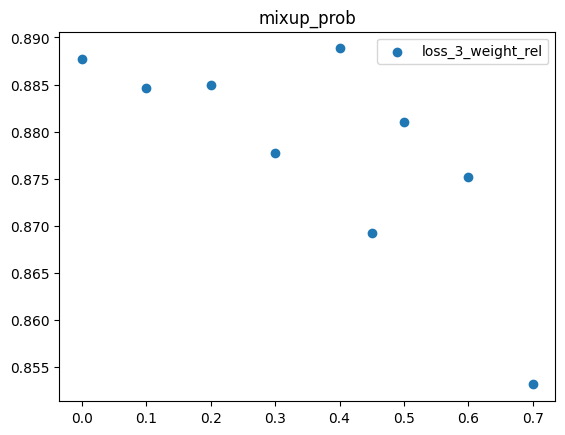

In [112]:
df['mixup_prob'] = df['batch_transform_kwargs_mixup_prob']
df['cutmix_prob'] = df['batch_transform_kwargs_cutmix_prob']

# round to 0.05
df['mixup_prob'] = df['mixup_prob'] // 0.05 * 0.05
df['cutmix_prob'] = df['cutmix_prob'] // 0.05 * 0.05

df_weights = df.groupby(['mixup_prob'])['best_surface_dice'].max().reset_index()
plt.scatter(df_weights['mixup_prob'], df_weights['best_surface_dice'], label='loss_3_weight_rel')
plt.legend()

plt.title('mixup_prob')

Text(0.5, 1.0, 'cutmix_prob')

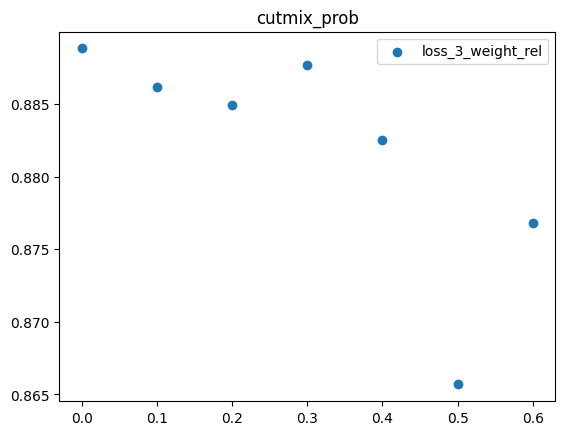

In [113]:
df_weights = df.groupby(['cutmix_prob'])['best_surface_dice'].max().reset_index()
plt.scatter(df_weights['cutmix_prob'], df_weights['best_surface_dice'], label='loss_3_weight_rel')
plt.legend()

plt.title('cutmix_prob')